In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import factorial
from scipy.stats import poisson
from scipy.stats import chi2
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = (5,3)

/var/folders/5h/w_ddszcj1b9581y293ys2dw40000gn/T/ipykernel_37163/1855272890.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


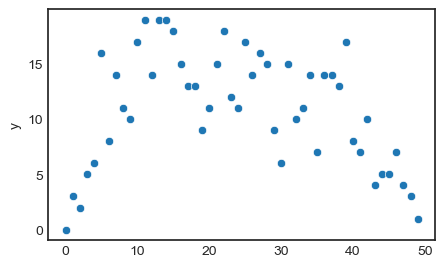

10.88
27.373061224489796


In [11]:
d = [0, 3, 2, 5, 6, 16, 8, 14, 11, 10, 17, 19, 14, 19, 19, 18, 15, 13, 13, 9, 11, 15, 18, 12, 11, 17, 14, 16, 15, 9, 6, 15, 10, 11, 14, 7, 14, 14, 13, 17, 8, 7, 10, 4, 5, 5, 7, 4, 3, 1]
#データフレームに変換
df = pd.DataFrame(d, columns=['y'])
sns.scatterplot(data=df, x=df.index, y='y')
plt.show()
print(df.y.mean())
print(df.y.var())

In [24]:
!pip install pymc
import pymc as pm
import arviz as az
import theano.tensor as tt
from pymc.distributions import continuous

AttributeError: partially initialized module 'theano' has no attribute 'compile' (most likely due to a circular import)

In [16]:
n = len(df)
W = np.zeros((n,n))
for i in range(n):
    if i>0:
        W[i,i-1] = 1
    if i<n-1:
        W[i,i+1] = 1
A = W.copy()
print(W)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [19]:
class CAR2(continuous.Continuous):
    def __init__(self, W, tau, *args, **kwargs):
        super(CAR2, self).__init__(*args, **kwargs)
        self.a = tt.as_tensor_variable(a)
        self.W = tt.as_tensor_variable(W)
        self.tau = tau * tt.sum(W, axis=1)
        self.mode = 0.
    
    def logp(self, x):
        tau = self.tau
        W = self.W
        a = self.a
        mu_w = tt.sum(x*a, axis=1)